In [1]:
import numpy as np
np.random.seed(123)

![logo](https://mkt.up.edu.mx/hs-fs/hubfs/universidad-panamericana-admisiones-logo.jpg?width=1500&name=universidad-panamericana-admisiones-logo.jpg)

# <p align="center">***PROCESAMIENTO DIGITAL DE IMÁGENES***
---
# <p align="center">***EXAMEN PARCIAL 2 Parte 1***
# <p align="center">11/Octubre/2023
# <br>
# <p align="center"> PROFESOR:
# <p align="center">_M. en I._ MIGUEL ANGEL CAMARGO ROJAS
# <br>
<p align="justified">
Código de ética profesional:<br>
Al entregar este archivo/documento con sus implementaciones/respuestas/desarrollo, acepta que el trabajo realizado es de su autoría y que de confirmarse lo contrario se anulará su trabajo/examen; siendo este remitido al consejo académico para su revisión y que la pena máxima puede causar baja definitiva de la Universidad.<br><br><br>

De la carpeta `images` cargue la imagen `fruits.jpg` como lo requiera para:
1.      Obtener su transformación negativa
2.      Obtener su transformación logarítmica
3.      Utilizando la transformación gamma, aclarar la imagen
4.      Utilizando la transformación gamma, oscurecer la imagen

_En todos los casos muestre la imagen que resulte de aplicar la transformación_

In [2]:
from dataclasses import dataclass
from typing import List, Tuple, Set
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

(-0.5, 511.5, 479.5, -0.5)

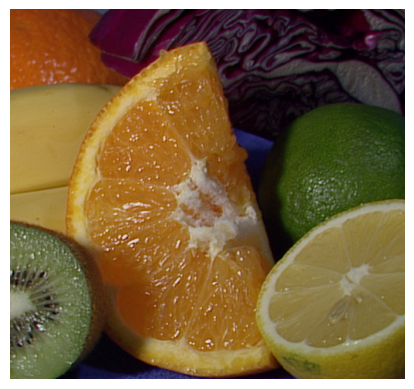

In [3]:
img = cv.imread("./fruits.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

Text(0.5, 1.0, 'Negative Transform')

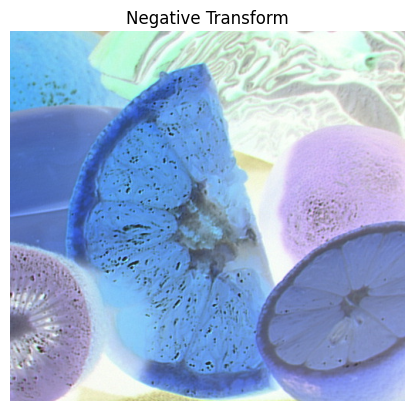

In [4]:
negative_transform = cv.bitwise_not(img)
plt.imshow(negative_transform)
plt.axis("off")
plt.title('Negative Transform')

Text(0.5, 1.0, 'Log Transform')

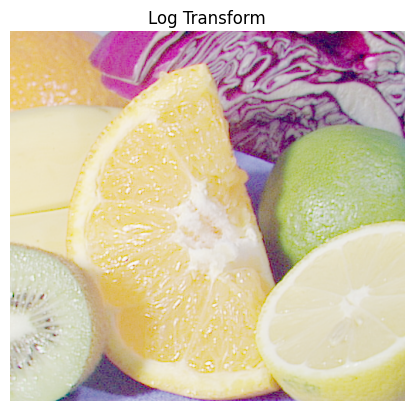

In [5]:
c = 255/(np.log(1 + np.max(img)))
log_transform = c * np.log(1 + img)

plt.imshow(log_transform.astype(np.uint8))
plt.axis("off")
plt.title('Log Transform')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Gamma Transform Brigthen')

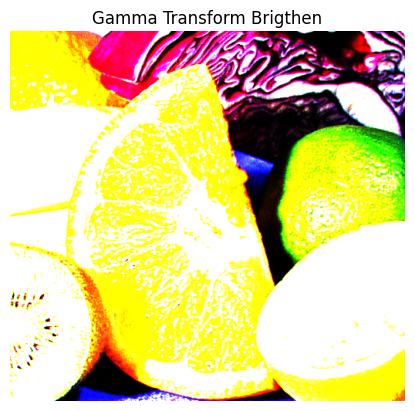

In [6]:
# gamma corrrect brightness
gamma = .3

gamma_corrected = np.power(
    img/255.0,1 /gamma
) * 255.0

gamma_corrected.astype(np.uint8)

plt.imshow(gamma_corrected)
plt.axis("off")
plt.title('Gamma Transform Brigthen')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Gamma Transform Darken')

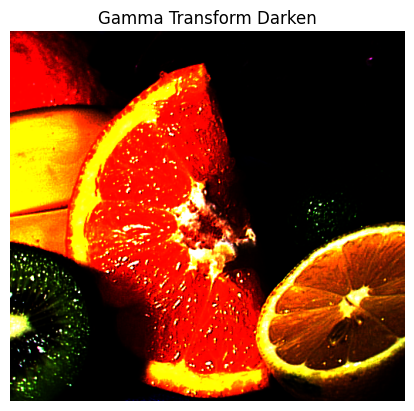

In [7]:
# gamma correct darken
gamma = .1
gamma_corrected = np.power(img/255.0,1/gamma)*255.0
gamma_corrected.astype(np.uint8)

plt.imshow(gamma_corrected)
plt.axis("off")
plt.title('Gamma Transform Darken')

---
De la siguiente imagen obtenga:
1.      La 4-vecindad del píxel (3,3)
2.      La 8-vecindad del píxel (9,9)
Con $V \in \{1,2,...,10\}$ obtenga:

3.      La 4-Adj del píxel (4,4)
4.      La m-Adj del píxel (5,1)

In [8]:
@dataclass
class Neighborhood:
    matrix: np.ndarray
    V: Set[int]
    
    # Constants for types of neighborhoods
    FOUR_NEIGHBORS = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    EIGHT_NEIGHBORS = FOUR_NEIGHBORS + [(-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    def __post_init__(self):
        """
        Initialize the rows and cols attributes based on the shape of the matrix.
        """
        self.rows, self.cols = self.matrix.shape
    
    def is_within_boundaries(self, i: int, j: int) -> bool:
        """
        Check if the given indices (i, j) are within the boundaries of the matrix.
        
        :param i: Row index.
        :param j: Column index.
        :return: True if indices are within boundaries, False otherwise.
        """
        return 0 <= i < self.rows and 0 <= j < self.cols
    
    def __get_neighbors(self, i: int, j: int, directions: List[Tuple[int, int]], apply_adjacency: bool = False) -> List[Tuple[int, int]]:
        """
        Get neighbors of a cell (i, j) based on the given directions.
        
        :param i: Row index of the cell.
        :param j: Column index of the cell.
        :param directions: List of tuples representing directions to look for neighbors.
        :param apply_adjacency: If True, return only neighbors that are within set V.
        :return: List of tuples representing the coordinates of the neighbors.
        """
        neighbors = []
        for dx, dy in directions:
            new_i, new_j = i + dx, j + dy
            if self.is_within_boundaries(new_i, new_j):
                if apply_adjacency:
                    if self.matrix[new_i, new_j] in self.V:
                        neighbors.append((new_i, new_j))
                else:
                    neighbors.append((new_i, new_j))
        return neighbors
    
    def get_four_neighbors(self, i: int, j: int, apply_adjacency: bool = False) -> List[Tuple[int, int]]:
        """
        Get the four neighbors of the cell at position (i, j).
        
        :param i: Row index of the cell.
        :param j: Column index of the cell.
        :param apply_adjacency: If True, return only neighbors that are within set V.
        :return: List of tuples representing the coordinates of the four neighbors.
        """
        return self.__get_neighbors(i, j, self.FOUR_NEIGHBORS, apply_adjacency=apply_adjacency)
    
    def get_eight_neighbors(self, i: int, j: int, apply_adjacency: bool = False) -> List[Tuple[int, int]]:
        """
        Get the eight neighbors of the cell at position (i, j).
        
        :param i: Row index of the cell.
        :param j: Column index of the cell.
        :param apply_adjacency: If True, return only neighbors that are within set V.
        :return: List of tuples representing the coordinates of the eight neighbors.
        """
        return self.__get_neighbors(i, j, self.EIGHT_NEIGHBORS, apply_adjacency=apply_adjacency)
    
    def get_m_neighbors(self, i: int, j: int, apply_adjacency: bool = False) -> List[Tuple[int, int]]:
        """
        Get the m-neighbors of the cell at position (i, j) based on m-adjacency.
        
        :param i: Row index of the cell.
        :param j: Column index of the cell.
        :param apply_adjacency: If True, return only neighbors that are within set V.
        :return: List of tuples representing the coordinates of the m-neighbors.
        """
        four_neighbors = self.__get_neighbors(i, j, self.FOUR_NEIGHBORS, apply_adjacency=False)
        eight_neighbors = self.__get_neighbors(i, j, self.EIGHT_NEIGHBORS, apply_adjacency=False)
        m_neighbors = four_neighbors.copy()
        
        for neighbor in eight_neighbors:
            if neighbor not in four_neighbors:
                i_neighbor, j_neighbor = neighbor
                is_m_adjacent = all(
                    (i_common, j_common) in four_neighbors
                    for i_common, j_common in self.__get_neighbors(i_neighbor, j_neighbor, self.FOUR_NEIGHBORS, apply_adjacency=False)
                    if (i_common, j_common) != (i, j)
                )
                if is_m_adjacent:
                    m_neighbors.append(neighbor)
        
        return self.adjacency(m_neighbors) if apply_adjacency else m_neighbors
    
    def adyacencia8(arreglo, punto, V={1}):
        x, y = punto
        ady = []
        if x > 0 and arreglo[x-1, y] in V:
            ady.append((x-1, y))
        if x < arreglo.shape[0] - 1 and arreglo[x+1, y] in V:
            ady.append((x+1, y))
        if y > 0 and arreglo[x, y-1] in V:
            ady.append((x, y-1))
        if y < arreglo.shape[1] - 1 and arreglo[x, y+1] in V:
            ady.append((x, y+1))
        if x > 0 and y > 0 and arreglo[x-1, y-1] in V:
            ady.append((x-1, y-1))
        if x > 0 and y < arreglo.shape[1] - 1 and arreglo[x-1, y+1] in V:
            ady.append((x-1, y+1))
        if x < arreglo.shape[0] - 1 and y > 0 and arreglo[x+1, y-1] in V:
            ady.append((x+1, y-1))
        if x < arreglo.shape[0] - 1 and y < arreglo.shape[1] - 1 and arreglo[x+1, y+1] in V:
            ady.append((x+1, y+1))
        return ady
    
    def getAsciiMatrix(self, neighbors: List[Tuple[int, int]]) -> List[List[str]]:

    # Create a 2D list that copies the original matrix but converts all elements to string type for uniformity
        asciiMatrix = [[str(self.matrix[i][j]) for j in range(self.cols)] for i in range(self.rows)]

        for element in neighbors:
            x, y = element

            # Ensure the coordinates are within the matrix boundaries
            if self.is_within_boundaries(x, y):
                asciiMatrix[x][y] = '*'  # Mark the neighbors

        # Mark the central point as 'P' if it's within boundaries. Adjust this if the central point is not always (1,1)
        if self.is_within_boundaries(1, 1):
            asciiMatrix[1][1] = 'P'

        return asciiMatrix



In [9]:
V = {
    1,2,3,4,5,6,7,8,9,10
}

#resize img to bidemensional
m = np.random.randint(15,size=(10,10))
print(m)
N = Neighborhood(m,V)

four_neigborhood = N.get_four_neighbors(3,3)
eigt_neigborhood = N.get_eight_neighbors(9,9)
four_adj = N.get_four_neighbors(4,4, apply_adjacency=True)
m_neigborhood = N.get_m_neighbors(5,1)

print(
    'four_neigborhood', four_neigborhood,
    '\neigt_neigborhood', eigt_neigborhood,
    '\nfour_adj', four_adj,
    '\nm_neigborhood', m_neigborhood
)

[[14 13 14  2 12  2  6  1  3 10]
 [11  9  6  1  0  1 14  9  0 14]
 [ 0  9  3 14 13  4  0  0  4  1]
 [ 7  3  2  4  7  2  4  8 13  0]
 [ 7  9  3 12 12  4  6  1  5  6]
 [14 11  2  1 12  8  3 10  5  0]
 [11  2 10 10  6 13  2  4 11 11]
 [13 12 14  4  6 13  3 10  0  6]
 [14  4  7 11  6  7  1 11 10  5]
 [ 7  9  2  4  8  1 12  2  1  1]]
four_neigborhood [(2, 3), (4, 3), (3, 2), (3, 4)] 
eigt_neigborhood [(8, 9), (9, 8), (8, 8)] 
four_adj [(3, 4), (4, 5)] 
m_neigborhood [(4, 1), (6, 1), (5, 0), (5, 2)]
